<a href="https://colab.research.google.com/github/Francisco2963/Redes_Neuronales_Recurrentes_y_Prophet_para_Predicci-n_de_Series_Temporales_-Core-/blob/main/Redes_Neuronales_Recurrentes_y_Prophet_para_Predicci%C3%B3n_de_Series_Temporales_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import os
import pandas as pd

In [2]:
# Paso 1: Subir el archivo ZIP desde la PC
uploaded = files.upload()

Saving air-quality-prediction.zip to air-quality-prediction (2).zip


In [3]:
# Paso 2: Extraer el contenido del archivo ZIP
# Obtener el nombre del archivo subido (debería ser el nombre de tu archivo ZIP)
zip_filename = list(uploaded.keys())[0]

In [4]:
# Crear una carpeta para extraer los archivos
extract_to = '/content/extracted_files/'
os.makedirs(extract_to, exist_ok=True)

In [5]:
# Extraer el archivo ZIP en la carpeta especificada
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [6]:
# Listar los archivos extraídos
print("Archivos extraídos:", os.listdir(extract_to))

Archivos extraídos: ['train.csv', 'test.csv', 'submit.csv']


In [7]:
# Paso 3: Cargar cada archivo CSV en un DataFrame por separado
train_df = pd.read_csv(os.path.join(extract_to, 'train.csv'))
test_df = pd.read_csv(os.path.join(extract_to, 'test.csv'))
submit_df = pd.read_csv(os.path.join(extract_to, 'submit.csv'))

In [8]:
# Mostrar las primeras filas de cada DataFrame para verificar la carga
print("Primeras filas de train.csv:")
print(train_df.head())

print("\nPrimeras filas de test.csv:")
print(test_df.head())

print("\nPrimeras filas de submit.csv:")
print(submit_df.head())

Primeras filas de train.csv:
   No  DEWP  TEMP    PRES cbwd   Iws  Is  Ir  AQI
0   1   -16  -4.0  1020.0   SE  1.79   0   0  129
1   2   -15  -4.0  1020.0   SE  2.68   0   0  148
2   3   -11  -5.0  1021.0   SE  3.57   0   0  159
3   4    -7  -5.0  1022.0   SE  5.36   1   0  181
4   5    -7  -5.0  1022.0   SE  6.25   2   0  138

Primeras filas de test.csv:
      No  DEWP  TEMP  PRES cbwd    Iws  Is  Ir  AQI
0  33406   -20  -9.0  1033   NW   6.71   0   0  NaN
1  33407   -19  -8.0  1034   NW  11.63   0   0  NaN
2  33408   -21 -10.0  1034   NW  15.65   0   0  NaN
3  33409   -19  -9.0  1034   cv   0.89   0   0  NaN
4  33410   -20  -9.0  1034   cv   1.78   0   0  NaN

Primeras filas de submit.csv:
      No  AQI
0  33406  NaN
1  33407  NaN
2  33408  NaN
3  33409  NaN
4  33410  NaN


# PREPROCESAMIENTO

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [10]:
# Paso 2: Verificar si hay valores faltantes en el conjunto de entrenamiento
print("\nValores faltantes en el conjunto de entrenamiento:")
print(train_df.isnull().sum())


Valores faltantes en el conjunto de entrenamiento:
No      0
DEWP    0
TEMP    0
PRES    0
cbwd    0
Iws     0
Is      0
Ir      0
AQI     0
dtype: int64


In [11]:
# Paso 3: Seleccionar las características y la variable objetivo
X_train = train_df.drop(['AQI', 'No'], axis=1)  # Eliminamos la columna 'AQI' (variable objetivo) y 'No' (no es relevante)
y_train = train_df['AQI']  # Variable objetivo

print("\nCaracterísticas seleccionadas para el entrenamiento:")
print(X_train.head())


Características seleccionadas para el entrenamiento:
   DEWP  TEMP    PRES cbwd   Iws  Is  Ir
0   -16  -4.0  1020.0   SE  1.79   0   0
1   -15  -4.0  1020.0   SE  2.68   0   0
2   -11  -5.0  1021.0   SE  3.57   0   0
3    -7  -5.0  1022.0   SE  5.36   1   0
4    -7  -5.0  1022.0   SE  6.25   2   0


In [12]:
# Paso 4: Identificar las columnas categóricas y numéricas
categorical_features = ['cbwd']  # Columna categórica
numeric_features = [col for col in X_train.columns if col not in categorical_features]

In [13]:
# Paso 5: Crear un preprocesador con OneHotEncoder para columnas categóricas y MinMaxScaler para las numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [14]:
# Paso 6: Aplicar el preprocesador a los datos de entrenamiento
X_train_scaled = preprocessor.fit_transform(X_train)

# Verificar la transformación
print("\nShape de X_train_scaled:", X_train_scaled.shape)
print("Primeras filas de X_train_scaled:", X_train_scaled[:5])


Shape de X_train_scaled: (41757, 10)
Primeras filas de X_train_scaled: [[0.35294118 0.24590164 0.52727273 0.00237151 0.         0.
  0.         0.         1.         0.        ]
 [0.36764706 0.24590164 0.52727273 0.00394662 0.         0.
  0.         0.         1.         0.        ]
 [0.42647059 0.2295082  0.54545455 0.00552173 0.         0.
  0.         0.         1.         0.        ]
 [0.48529412 0.2295082  0.56363636 0.00868965 0.03703704 0.
  0.         0.         1.         0.        ]
 [0.48529412 0.2295082  0.56363636 0.01026476 0.07407407 0.
  0.         0.         1.         0.        ]]


In [15]:
# Paso 7: Dividir el conjunto de datos en entrenamiento y prueba
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42)

# Confirmar división de datos
print("\nTamaño del conjunto de entrenamiento y prueba:")
print("X_train_split:", X_train_split.shape)
print("X_test_split:", X_test_split.shape)
print("y_train_split:", y_train_split.shape)
print("y_test_split:", y_test_split.shape)


Tamaño del conjunto de entrenamiento y prueba:
X_train_split: (33405, 10)
X_test_split: (8352, 10)
y_train_split: (33405,)
y_test_split: (8352,)


# modelo LSTM

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

In [17]:
# Paso 1: Definir una función para crear las secuencias de la serie temporal
def crear_secuencias(data, n_steps):
    """
    Crea secuencias de longitud n_steps a partir de los datos.
    :param data: Serie temporal (array) a transformar en secuencias.
    :param n_steps: Número de pasos a usar en cada secuencia.
    :return: Secuencias de entrada X y salidas Y.
    """
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [18]:
# Paso 2: Seleccionar la variable objetivo (AQI) para la predicción de la serie temporal
# y establecer una longitud de secuencia (n_steps)
n_steps = 10  # Número de pasos para la secuencia
y_train_series = train_df['AQI'].values

In [19]:
# Crear las secuencias usando la función definida
X_series, y_series = crear_secuencias(y_train_series, n_steps)


In [20]:
# Paso 3: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_series, y_series, test_size=0.2, random_state=42)

In [21]:
# Paso 4: Construcción del modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))  # 50 neuronas en la capa LSTM
model.add(Dense(1))  # Capa de salida
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Paso 5: Entrenamiento del modelo
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Redimensionar para LSTM
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Redimensionar para LSTM

model.fit(X_train, y_train, epochs=50, verbose=1)  # Entrenamiento con 50 épocas

Epoch 1/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3290.3113
Epoch 2/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 824.2997
Epoch 3/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 976.2537
Epoch 4/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 703.1461
Epoch 5/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 658.7819
Epoch 6/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 627.1226
Epoch 7/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 613.5366
Epoch 8/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 521.1350
Epoch 9/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 534.1556
Epoch 10/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 810.0652
Epoch 11/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 621.4947
Epoch 12/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 531.6129
Epoch 13/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 596.5060
Epoch 14/50
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 621.2592


In [25]:
# Paso 6: Evaluación del modelo en el conjunto de prueba
y_pred_lstm = model.predict(X_test, verbose=1)
mse = np.mean((y_pred_lstm - y_test) ** 2)
print(f"Mean Squared Error del modelo LSTM: {mse}")

261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error del modelo LSTM: 16158.023208749742


# Predicción con Prophet

In [26]:
!pip install prophet

In [27]:
!pip uninstall -y fbprophet prophet

Found existing installation: prophet 1.1.6
Uninstalling prophet-1.1.6:
  Successfully uninstalled prophet-1.1.6


In [28]:
# Instalar pystan, que es una dependencia necesaria para Prophet
!pip install pystan==2.19.1.1

# Instalar prophet
!pip install prophet

  Using cached prophet-1.1.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
Using cached prophet-1.1.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.4 MB)


In [29]:
# Importar Prophet
from prophet import Prophet

# Imprimir un mensaje de confirmación
print("Prophet se ha importado correctamente.")

Prophet se ha importado correctamente.


In [30]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
train_df_prophet = train_df[['No', 'AQI']].rename(columns={'No': 'ds', 'AQI': 'y'})

In [32]:
# Crear un rango de fechas a partir de una fecha específica

start_date = '2023-01-01'  # Fecha de inicio
train_df_prophet = train_df[['No', 'AQI']].copy()  # Crear una copia
train_df_prophet['ds'] = pd.to_datetime(start_date) + pd.to_timedelta(train_df_prophet['No'], unit='D') # Convertir a datetime
train_df_prophet = train_df_prophet[['ds', 'AQI']].rename(columns={'AQI': 'y'}) # Renombrar columna

In [33]:
# Crear y ajustar el modelo Prophet
model_prophet = Prophet()
model_prophet.fit(train_df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndu4rdou/3qo8s5h1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndu4rdou/276gjewy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42003', 'data', 'file=/tmp/tmpndu4rdou/3qo8s5h1.json', 'init=/tmp/tmpndu4rdou/276gjewy.json', 'output', 'file=/tmp/tmpndu4rdou/prophet_modelhbjfbg3q/prophet_model-20241010024321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:43:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
# Crear un dataframe para las fechas futuras
future = model_prophet.make_future_dataframe(periods=len(y_test))
forecast = model_prophet.predict(future)

In [35]:
# Obtener las predicciones para el conjunto de prueba
forecast_test = forecast.tail(len(y_test))

In [37]:
y_pred_lstm = model.predict(X_test)

261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
# Paso 6: Comparación de resultados
# Calcular MSE y RMSE para ambos modelos
mse_lstm = np.mean((y_pred_lstm - y_test) ** 2)
rmse_lstm = np.sqrt(mse_lstm)
mse_prophet = np.mean((forecast_test['yhat'].values - y_test) ** 2)
rmse_prophet = np.sqrt(mse_prophet)

print(f"RMSE del modelo LSTM: {rmse_lstm}")
print(f"RMSE del modelo Prophet: {rmse_prophet}")

RMSE del modelo LSTM: 127.11421324442732
RMSE del modelo Prophet: 96.1402429543854


In [39]:
import matplotlib.pyplot as plt

In [40]:
# Preparar las fechas para el conjunto de prueba
test_dates = pd.date_range(start=start_date, periods=len(y_test), freq='D')

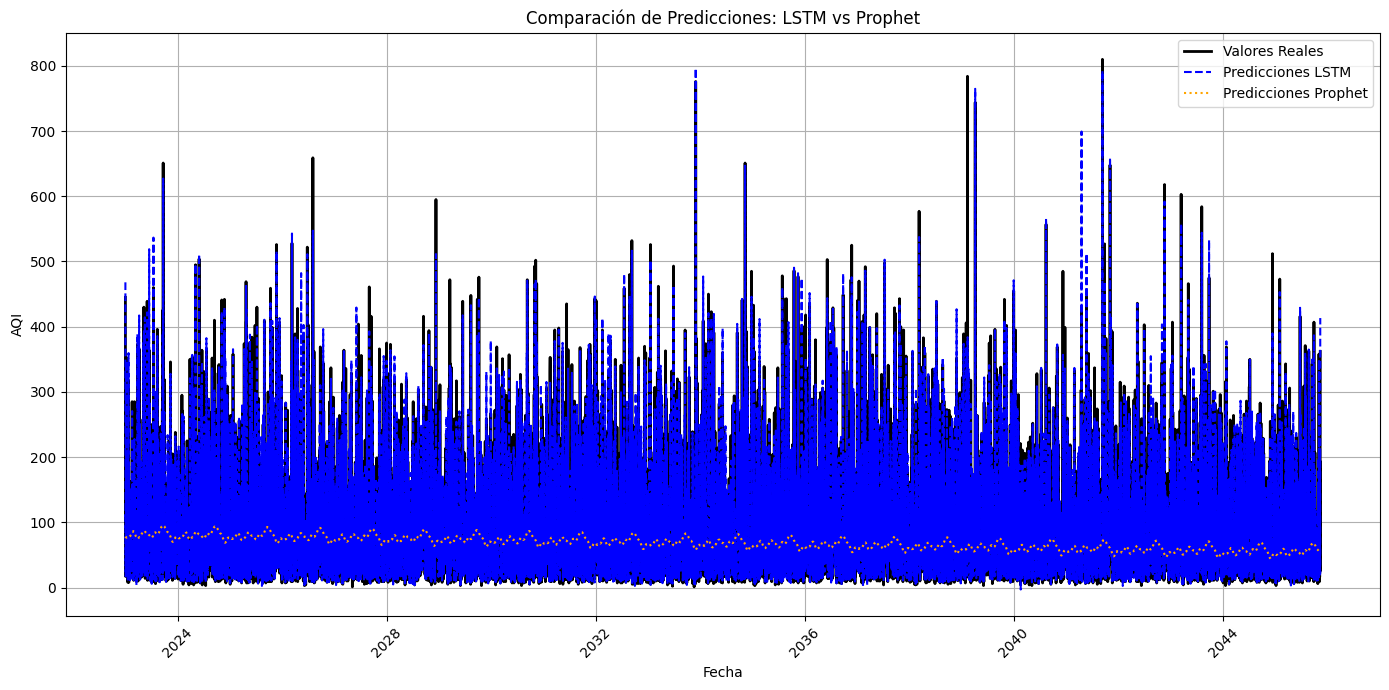

In [41]:


# Crear la figura y los ejes para los gráficos
plt.figure(figsize=(14, 7))

# Graficar los valores reales
plt.plot(test_dates, y_test, label='Valores Reales', color='black', linewidth=2)

# Graficar las predicciones del modelo LSTM
plt.plot(test_dates, y_pred_lstm, label='Predicciones LSTM', color='blue', linestyle='dashed')

# Graficar las predicciones del modelo Prophet
plt.plot(test_dates, forecast_test['yhat'].values, label='Predicciones Prophet', color='orange', linestyle='dotted')

# Añadir título y etiquetas
plt.title('Comparación de Predicciones: LSTM vs Prophet')
plt.xlabel('Fecha')
plt.ylabel('AQI')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

COMENTARIO

RMSE del Modelo LSTM: 127.11

Un RMSE de aproximadamente 127.11 indica que, en promedio, las predicciones del modelo LSTM se desvían de los valores reales del AQI en alrededor de 127 unidades.

Este valor sugiere que, aunque el modelo LSTM es capaz de captar algunas fluctuaciones en los datos, su precisión en la predicción no es óptima, lo que puede ser la razón por la que no sigue perfectamente los picos y valles de los datos reales en la gráfica.

RMSE del Modelo Prophet: 96.14

Un RMSE de aproximadamente 96.14 indica que las predicciones de Prophet se desvían de los valores reales en un promedio de 96 unidades, lo que es una mejora significativa respecto al LSTM.

Esto sugiere que Prophet tiene un mejor rendimiento general en la predicción del AQI, capturando mejor la tendencia general y los cambios en los datos en comparación con el modelo LSTM.

Interpretación Conjunta con la Gráfica

Mejor Rendimiento de Prophet: Dado que Prophet tiene un RMSE más bajo, se puede concluir que este modelo es más preciso en la predicción del AQI en comparación con LSTM. En la gráfica, se observa que la línea de Prophet sigue más de cerca las tendencias generales de los datos reales, lo que respalda la idea de que este modelo está haciendo un mejor trabajo al capturar la dinámica del AQI.

Sensibilidad del Modelo LSTM: A pesar de que el modelo LSTM muestra cierta sensibilidad a las fluctuaciones, su RMSE relativamente alto indica que estas predicciones son menos precisas en promedio. La variabilidad en la calidad del aire puede ser compleja de modelar, y el LSTM puede no estar configurado de manera óptima para este conjunto de datos en particular.

Impacto de las Fluctuaciones: La gráfica muestra que ambos modelos luchan con los picos abruptos en los datos reales, pero Prophet parece manejar mejor estos momentos, como se ve en su capacidad para mantenerse más cerca de los valores reales en general.